In [2]:
# Import libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import scipy.stats as stats
import sklearn

# Load JSON data
with open('/Users/andreapena/Desktop/ultimate_challenge/ultimate_data_challenge.json') as f:
    data = json.load(f)

# Check the structure
print(type(data))  

# Create a dataframe
df = pd.DataFrame(data)

<class 'list'>


In [3]:
# Check out dataset.
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
df.describe(include='all')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
count,50000,50000.000000,50000,41878.000000,50000.000000,50000,49604,50000.000000,50000,50000.000000,50000.000000,49799.000000
unique,3,NaN,31,NaN,NaN,182,2,NaN,2,NaN,NaN,NaN
top,Winterfell,NaN,2014-01-18,NaN,NaN,2014-06-29,iPhone,NaN,False,NaN,NaN,NaN
freq,23336,NaN,2948,NaN,NaN,2036,34582,NaN,31146,NaN,NaN,NaN
mean,NaN,2.278200,NaN,4.601559,1.074764,NaN,NaN,8.849536,NaN,60.926084,5.796827,4.778158
std,NaN,3.792684,NaN,0.617338,0.222336,NaN,NaN,19.958811,NaN,37.081503,5.707357,0.446652
min,NaN,0.000000,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000
25%,NaN,0.000000,NaN,4.300000,1.000000,NaN,NaN,0.000000,NaN,33.300000,2.420000,4.700000
50%,NaN,1.000000,NaN,4.900000,1.000000,NaN,NaN,0.000000,NaN,66.700000,3.880000,5.000000
75%,NaN,3.000000,NaN,5.000000,1.050000,NaN,NaN,8.600000,NaN,100.000000,6.940000,5.000000


In [6]:
df.isnull().sum().sort_values(ascending=False)

avg_rating_of_driver      8122
phone                      396
avg_rating_by_driver       201
city                         0
trips_in_first_30_days       0
signup_date                  0
avg_surge                    0
last_trip_date               0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
dtype: int64

In [7]:
categorical_columns = df.select_dtypes(include='object')
numeric_columns = df.select_dtypes(include='number')

# Fill categorical NaNs with mode
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

# Fill numeric NaNs with median
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

In [8]:
df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [9]:
df[df.duplicated()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
2608,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0
18057,Astapor,1,2014-01-11,5.0,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0
29601,Winterfell,1,2014-01-01,4.9,1.0,2014-01-02,Android,0.0,False,100.0,8.08,5.0
34641,Winterfell,1,2014-01-18,4.9,1.0,2014-01-19,iPhone,0.0,True,0.0,1.44,5.0
36627,Winterfell,1,2014-01-18,5.0,1.0,2014-01-19,Android,0.0,False,0.0,3.54,5.0
39601,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.00,5.0
42025,Winterfell,1,2014-01-18,4.9,1.0,2014-01-19,Android,0.0,False,0.0,0.01,5.0
45416,Astapor,1,2014-01-20,5.0,1.0,2014-01-20,iPhone,0.0,False,100.0,3.06,5.0


In [10]:
df = df.drop_duplicates()

In [11]:
df.describe(include='all')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
count,49992,49992.000000,49992,49992.000000,49992.000000,49992,49992,49992.000000,49992,49992.000000,49992.00000,49992.000000
unique,3,NaN,31,NaN,NaN,182,2,NaN,2,NaN,NaN,NaN
top,Winterfell,NaN,2014-01-18,NaN,NaN,2014-06-29,iPhone,NaN,False,NaN,NaN,NaN
freq,23331,NaN,2944,NaN,NaN,2036,34974,NaN,31141,NaN,NaN,NaN
mean,NaN,2.278405,NaN,4.649988,1.074776,NaN,NaN,8.850952,NaN,60.929833,5.79726,4.779015
std,NaN,3.792953,NaN,0.575633,0.222352,NaN,NaN,19.960094,NaN,37.078229,5.70761,0.446001
min,NaN,0.000000,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.00000,1.000000
25%,NaN,0.000000,NaN,4.500000,1.000000,NaN,NaN,0.000000,NaN,33.300000,2.42000,4.700000
50%,NaN,1.000000,NaN,4.900000,1.000000,NaN,NaN,0.000000,NaN,66.700000,3.88000,5.000000
75%,NaN,3.000000,NaN,5.000000,1.050000,NaN,NaN,8.600000,NaN,100.000000,6.94000,5.000000


In [12]:
# Make a copy of the original dataframe first
df = df.copy()

# Convert last_trip_date to datetime
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

# Define the retention cutoff
cutoff = pd.to_datetime('2014-06-01')

# Create binary target column
df['retained'] = df['last_trip_date'] >= cutoff

NOTES: Retained if they took a trip in the last 30 days.

In [14]:
df['retained'].mean() 

0.3761401824291887

NOTES:

- **37.6% of users are retained**: This means over 1 in 3 users stayed active in the last 30 days.

In [16]:
df['retained'].value_counts(normalize=True)

retained
False    0.62386
True     0.37614
Name: proportion, dtype: float64

NOTES:

False - not retained(62.4%)
True - retained(37.6%)

Classes are slightly imbalanced. 

In [17]:
# Dropped columns 
df.drop(columns=['signup_date', 'last_trip_date'], inplace=True)

NOTES:

'signup_date': not useful on its own.

'last_trip_date': used to create 'retained'.

<Axes: xlabel='retained', ylabel='trips_in_first_30_days'>

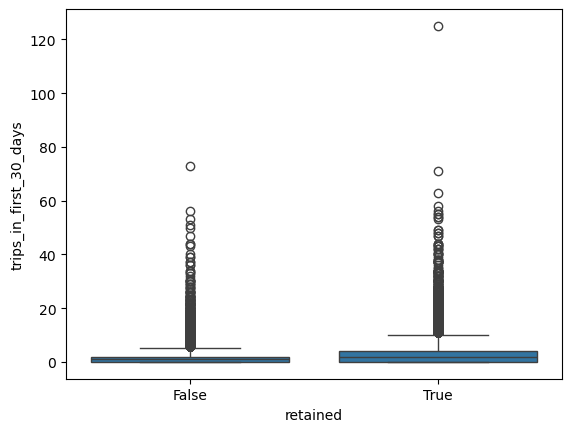

In [21]:
# Distribution boxplot
sns.boxplot(x='retained', y='trips_in_first_30_days', data=df)

NOTES: The graph shows significant outliers, especially for retained users. The median is higher for the retained group, indicating early activity might be predictive of retention. Suggesting log transforming or binning may help.

<Axes: xlabel='avg_dist', ylabel='weekday_pct'>

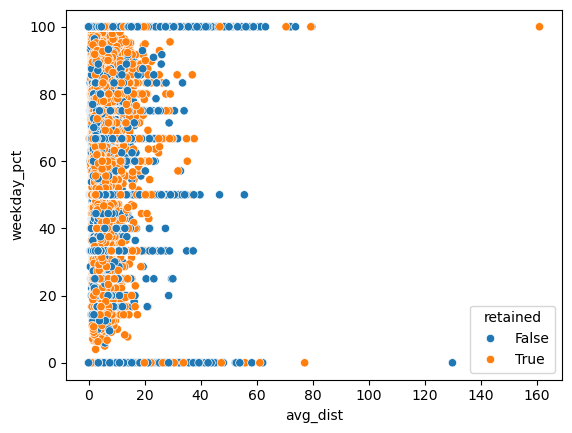

In [23]:
# Distribution scatterplot
sns.scatterplot(x='avg_dist', y='weekday_pct', hue='retained', data=df)

NOTES: Retained users cluster more around higher weekday_pct, supporting regular commuting behavior. 

<Axes: xlabel='city'>

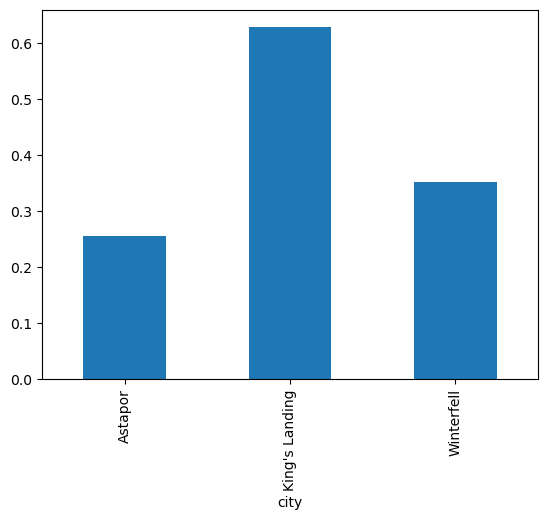

In [25]:
# Bar: retention rate per city
df.groupby('city')['retained'].mean().plot(kind='bar')

NOTES: King's Landing city stands out with higher retention than the other cities.

<Axes: xlabel='phone'>

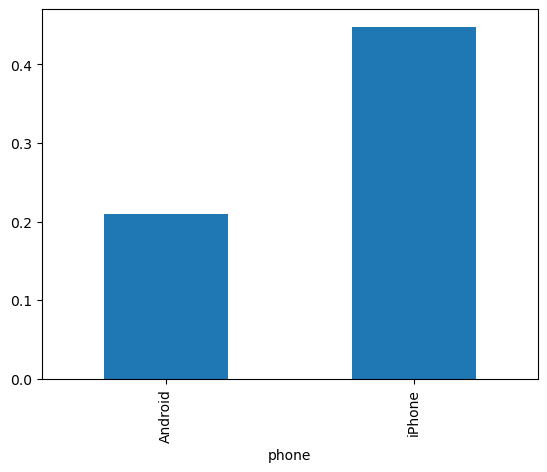

In [27]:
# Bar: Retention rate per phone
df.groupby('phone')['retained'].mean().plot(kind='bar')

NOTES: iPhone users dominate both classes, but retention rate appears higher in iPhone users than Android users (proportionally). 

In [29]:
# Log transformation
df['log_trips'] = np.log1p(df['trips_in_first_30_days'])
df['log_surge'] = np.log1p(df['avg_surge'])
df['log_surge_pct'] = np.log1p(df['surge_pct'])
df['log_avg_dist'] = np.log1p(df['avg_dist'])
df['log_weekday_pct'] = np.log1p(df['weekday_pct'])

In [30]:
# Scale the log-transformed columns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# One-hot encode
df = pd.get_dummies(df, columns=['city', 'phone'], drop_first=True)

# Log transformation of skewed numeric features
df['log_trips']        = np.log1p(df['trips_in_first_30_days'])
df['log_surge']        = np.log1p(df['avg_surge'])
df['log_surge_pct']    = np.log1p(df['surge_pct'])
df['log_avg_dist']     = np.log1p(df['avg_dist'])
df['log_weekday_pct']  = np.log1p(df['weekday_pct'])

scale_cols = ['log_trips', 'log_surge', 'log_surge_pct', 'log_avg_dist', 'log_weekday_pct']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])  

# Define features and target
X = df.drop(columns=['retained']) 
y = df['retained']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Create and train model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predict on test data
y_pred = logreg_model.predict(X_test)

# Predict probabilities for class 1(defaults)
y_prob = logreg_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print("Logistic Regression Results")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Logistic Regression Results
Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.87      0.82      6201
        True       0.73      0.57      0.64      3798

    accuracy                           0.76      9999
   macro avg       0.75      0.72      0.73      9999
weighted avg       0.76      0.76      0.75      9999

Confusion Matrix:
 [[5403  798]
 [1617 2181]]
ROC AUC Score: 0.8163678011810593


NOTES: 

This is solid for baseline.

ROC AUC of 0.82 suggests good separation between retained and not retained

You’re catching over 57% of retained users, which is decent given the class imbalance.

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create and train model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Predict probabilities for class 1(defaults)
y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print("Random Forest Results")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Random Forest Results
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.83      0.81      6201
        True       0.70      0.64      0.67      3798

    accuracy                           0.76      9999
   macro avg       0.74      0.74      0.74      9999
weighted avg       0.76      0.76      0.76      9999

Confusion Matrix:
 [[5159 1042]
 [1372 2426]]
ROC AUC Score: 0.8253807905585901


NOTES:

Random Forest wins on recall, F1, and AUC, which are more important for retention problems.

Logistic Regression has slightly higher precision, but not by much.

Random Forest does a better job at identifying retained users, which is typically what you'd want in a churn/retention use case.

In [33]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(random_state=1234, eval_metric='logloss') #  log loss (penalizes confident wrong guesses)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Predict probabilities for class 1(defaults)
y_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print("XGBoost Results")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

XGBoost Results
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.83      0.81      6201
        True       0.70      0.64      0.67      3798

    accuracy                           0.76      9999
   macro avg       0.74      0.74      0.74      9999
weighted avg       0.76      0.76      0.76      9999

Confusion Matrix:
 [[5159 1042]
 [1372 2426]]
ROC AUC Score: 0.8560124116623564


NOTES: 

XGBoost ties with RF on recall and F1 score but edges out in ROC AUC, which makes it the best model for overall class separation.

Accuracy alone can be misleading with imbalanced data — but ROC AUC (0.856) shows the model is confidently distinguishing retained from not-retained users.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

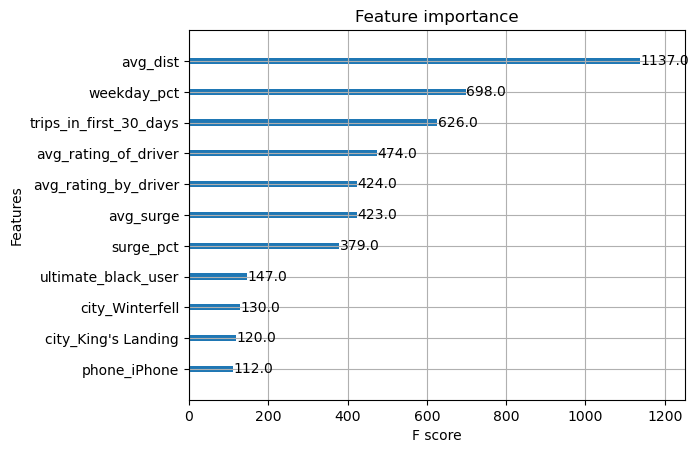

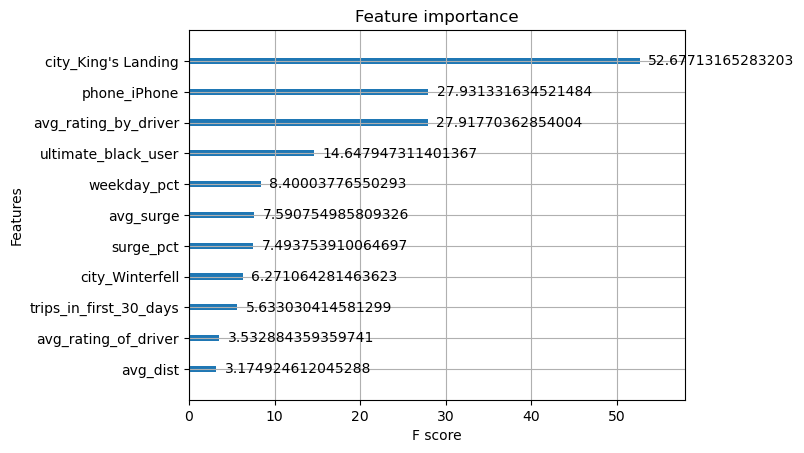

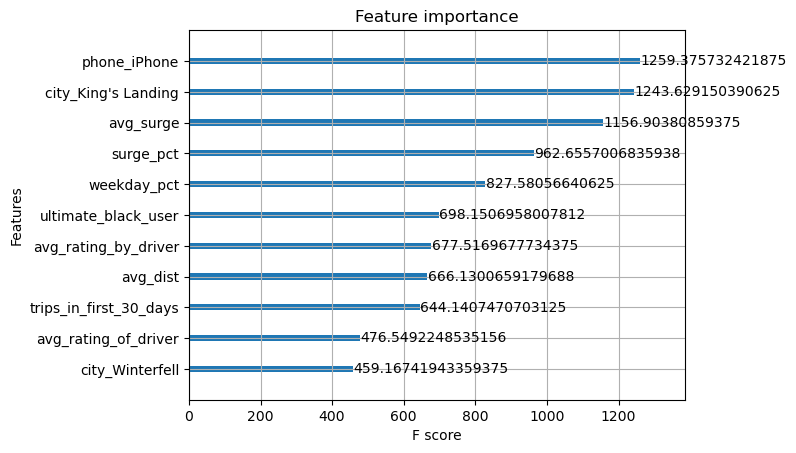

In [35]:
from xgboost import plot_importance

# Default feature importance
plot_importance(xgb_model, importance_type='weight') # Number of times a feature is used in trees to split data.

# More options
plot_importance(xgb_model, importance_type='gain') # Average accuracy improvement
plot_importance(xgb_model, importance_type='cover') # Samples affected by splits

NOTES:

First chart: This chart shows the number of times each feature is used to split the data across all trees (frequency-based). Features like avg_dist, weekday_pct, and trips_in_first_30_days were most frequently used to make decisions.

Second chart: This chart shows how much each feature contributes to reducing the model's loss function (e.g., logloss). Features like city_King's Landing, phone_iPhone, and avg_rating_by_driver provide the most gain per split.

Third bar chart: This chart shows how much each feature contributes across all splits, normalized over all trees. It reflects how much the feature affects the final prediction.

Conclusion:

To predict whether a user would be active in their 6th month, I began with Logistic Regression as a baseline due to its simplicity and interpretability. From there, I transitioned to non-linear models like Random Forest and XGBoost, which better capture interactions and complexity in the data. I ultimately selected XGBoost as the best-performing model, based on its ROC AUC score of 0.86, which indicates strong predictive power and generalization ability.

While I did not perform hyperparameter tuning in this iteration, that would be a valuable next step — especially for Random Forest and XGBoost — to potentially improve recall or reduce overfitting. Overall, I believe the model is valid given its performance metrics and consistent behavior across several classification algorithms.

Model Insights:

The most predictive features — avg_dist, weekday_pct, and trips_in_first_30_days — highlight that early user behavior is a strong signal of long-term engagement. 

Ways to improve retention:

Target users with low early usage (e.g., long infrequent weekend-only rides) with tailored incentives.

Reinforce weekday or short-trip behavior by offering promotions or loyalty points during early weeks.

Prioritize onboarding experience to drive higher early trip frequency.

By intervening during the critical first 30 days, Ultimate can use the model to guide data-driven retention strategies before user churn occurs.